In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Informacion de las columnas
- item_id
- description: Descripcion del shipping (por ejemplo, free shipping, letter, priority mail, etc)
- est_delivery: Tiempo estimado de entrega (generalmente en días)
- price: Precio de la opción de envio [BTC]
- timestamp: Fecha y hora en la que se scrapeo

In [2]:
shipping_skilroad = pd.read_csv('csv/silkroad_shippings.csv')
shipping_skilroad.head()

,item_id,description,est_delivery,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23T05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23T05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23T05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23T05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23T05:39:41


In [3]:
shipping_skilroad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560458 entries, 0 to 560457
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_id       560458 non-null  object 
 1   description   559657 non-null  object 
 2   est_delivery  560458 non-null  object 
 3   price         560423 non-null  float64
 4   timestamp     560458 non-null  object 
dtypes: float64(1), object(4)
memory usage: 21.4+ MB


In [15]:
# podemos ver que hay algunos datos con Nulls para algunas columnas como descripcion
for c in shipping_skilroad.columns:
    print("column: "+c + "\n")
    print(shipping_skilroad[c].isnull().value_counts())

column: item_id

False    560458
Name: item_id, dtype: int64
column: description

False    559657
True        801
Name: description, dtype: int64
column: est_delivery

False    560458
Name: est_delivery, dtype: int64
column: price

False    560423
True         35
Name: price, dtype: int64
column: timestamp

False    560458
Name: timestamp, dtype: int64


In [16]:
shipping_skilroad.rename(columns={'est_delivery':'delivery_days'},inplace=True)
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23T05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23T05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23T05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23T05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23T05:39:41


In [17]:
# Para los dias, y el timestamp, es conveniente trabajar con numericos
shipping_skilroad['timestamp'] = pd.to_datetime(shipping_skilroad['timestamp'])

In [18]:
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23 05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23 05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23 05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23 05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23 05:39:41


In [23]:
def make_numeric(x):
    num = ""
    for letter in x:
        if letter.isnumeric():
            num +=letter
    return num

In [25]:
shipping_skilroad['delivery_days'] = shipping_skilroad['delivery_days'].map(make_numeric)
shipping_skilroad['delivery_days']

0         1
1         4
2         4
3         4
4         1
         ..
560453    3
560454    3
560455    1
560456    3
560457    7
Name: delivery_days, Length: 560458, dtype: object

In [32]:
shipping_skilroad.fillna(0,inplace=True)
shipping_skilroad['delivery_days'] = shipping_skilroad['delivery_days'].astype(int)

In [33]:
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41


In [35]:
shipping_skilroad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560458 entries, 0 to 560457
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_id        560458 non-null  object        
 1   description    560458 non-null  object        
 2   delivery_days  560458 non-null  int32         
 3   price          560458 non-null  float64       
 4   timestamp      560458 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 19.2+ MB


In [37]:
shipping_skilroad['year'] = shipping_skilroad['timestamp'].dt.year
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,year
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014


In [38]:
shipping_skilroad['day_num'] = shipping_skilroad['timestamp'].dt.day
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,year,day_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014,23
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014,23
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014,23
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014,23
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014,23


In [39]:
shipping_skilroad['month_num'] = shipping_skilroad['timestamp'].dt.month
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,year,day_num,month_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014,23,2
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014,23,2
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014,23,2
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014,23,2
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014,23,2


In [49]:
shipping_skilroad['year'].value_counts()

2014    553798
2015      6660
Name: year, dtype: int64

Text(0.5, 1.0, 'Cantidad de shippings por año')

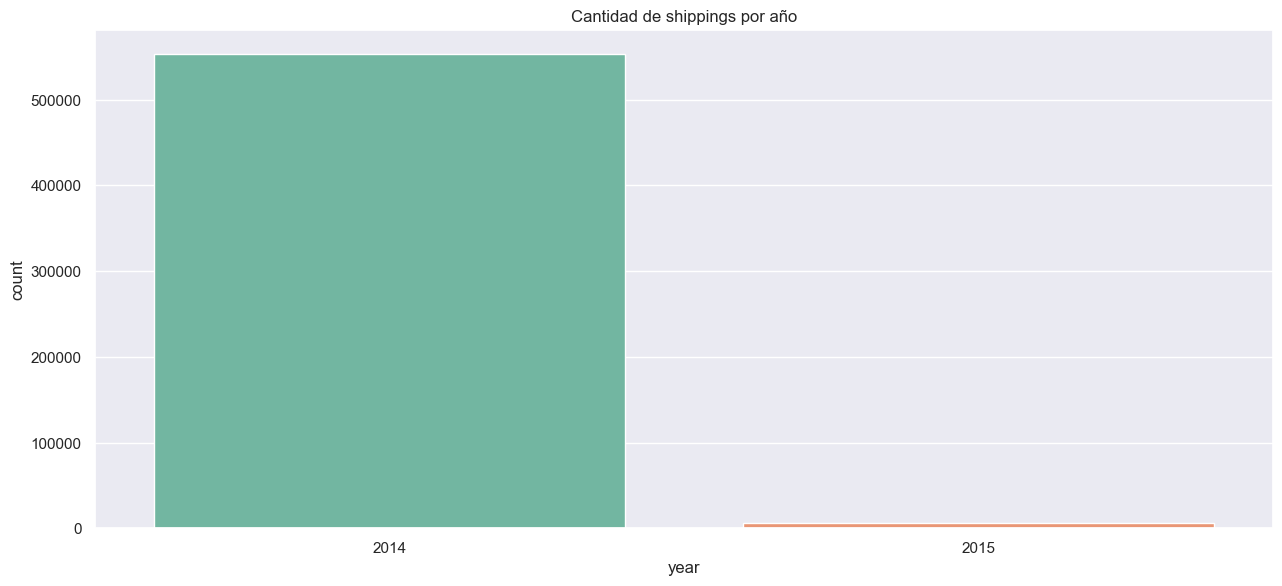

In [48]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
ax = sns.countplot(data=shipping_skilroad,x='year',palette='Set2')
ax.set_title('Cantidad de shippings por año')

Text(0.5, 1.0, 'Cantidad de shippings por mes')

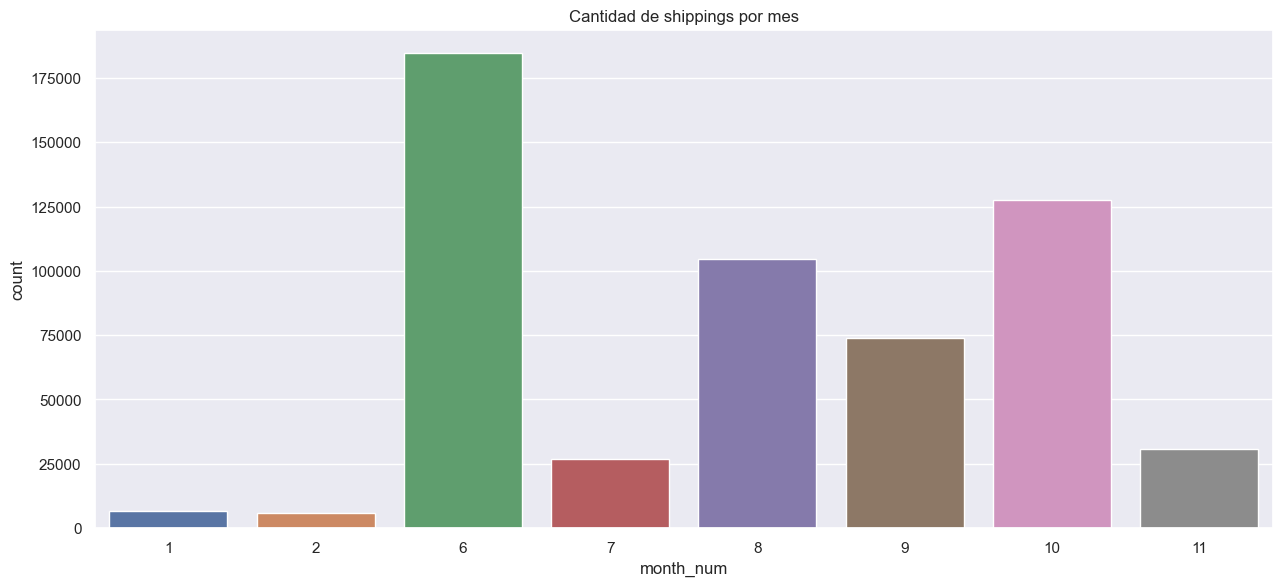

In [52]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
ax = sns.countplot(data=shipping_skilroad,x='month_num')
ax.set_title('Cantidad de shippings por mes')